### the method:
1. load data as matrix
2. get average from near-palm points
3. add average as second row
4. save newly formatted data

In [48]:
def unpickle(filepath):
    with open(filepath, "rb") as input_file:
        e = pickle.load(input_file)
    return e

In [49]:
def dumpPickle(data, filePath):
    with open(filePath,'wb') as f:
        pickle.dump(data, f)

In [50]:
import pickle
from os import listdir
from os.path import isfile, join
from sklearn import preprocessing
import numpy as np
import tqdm
fileNames = [f for f in listdir("../leapDataCollector/train/mpJoints") if
         isfile(join("../leapDataCollector/train/mpJoints", f))]

for file in tqdm.tqdm(fileNames):
    filepath = f"../leapDataCollector/train/mpJoints/{file}"
    savePath=f"mpJoints/{file}"
    e = unpickle(filepath)
    mat = [[i.x, i.y, i.z] for ind, i in enumerate(e[0].landmark)]
    middleHandIndexes = [0,1,5,9,13,17]
    palmLandmarks=list(map(e[0].landmark.__getitem__, middleHandIndexes))
    palmAvg3d = np.average([[i.x,i.y,i.z] for i in palmLandmarks],axis=0)
    mat = np.insert(mat, 1, palmAvg3d, 0)
    mat = preprocessing.minmax_scale(mat)
    dumpPickle(mat, savePath)

100%|██████████| 22000/22000 [00:08<00:00, 2635.52it/s]


----
drafts below

In [101]:
e = unpickle(r"train/mpJoints/B-2.pickle")

In [102]:
mat = [[i.x, i.y, i.z] for ind, i in enumerate(e[0].landmark)]

In [103]:
middleHandIndexes = [0,1,5,9,13,17]
palmLandmarks=list(map(e[0].landmark.__getitem__, middleHandIndexes))
palmAvg3d = numpy.average([[i.x,i.y,i.z] for i in palmLandmarks],axis=0)

In [104]:
print(len(mat), len(mat[0]))
import pprint
pprint.pprint(mat)

21 3
[[0.5199939608573914, 0.5763368606567383, -1.7280060715663126e-10],
 [0.4938927888870239, 0.5695252418518066, -0.008533592335879803],
 [0.47593826055526733, 0.5461460947990417, -0.012021536007523537],
 [0.4690607190132141, 0.5239511132240295, -0.015500140376389027],
 [0.4598347246646881, 0.5077528953552246, -0.019646478816866875],
 [0.48979559540748596, 0.51036137342453, -0.003838928882032633],
 [0.4875582754611969, 0.4812280535697937, -0.00938338227570057],
 [0.48698872327804565, 0.4629904329776764, -0.015196658670902252],
 [0.4872935712337494, 0.4478204846382141, -0.019802482798695564],
 [0.5052220225334167, 0.5063795447349548, -0.004794488660991192],
 [0.5024140477180481, 0.4752093255519867, -0.00997546873986721],
 [0.5010561943054199, 0.4543832242488861, -0.018664788454771042],
 [0.4999559223651886, 0.437949538230896, -0.02561173215508461],
 [0.5205162763595581, 0.5073155164718628, -0.006810604128986597],
 [0.5175029635429382, 0.4780398905277252, -0.012670453637838364],
 [0.51

In [105]:
palmAvg3d

array([ 0.5109663 ,  0.53044221, -0.00567112])

In [106]:
mat = np.insert(mat, 1, palmAvg3d, 0)
mat = preprocessing.minmax_scale(mat)
print(mat.shape)
print(mat)

(22, 3)
[[0.78595955 1.         1.        ]
 [0.66801624 0.66836086 0.79540454]
 [0.4449568  0.95077859 0.69213594]
 [0.21038711 0.78183864 0.56630236]
 [0.12053442 0.62145559 0.4408057 ]
 [0.         0.50440572 0.29121939]
 [0.39142838 0.52325483 0.86150402]
 [0.36219857 0.31273468 0.6614783 ]
 [0.35475757 0.1809479  0.45175433]
 [0.35874031 0.0713284  0.28559128]
 [0.5929693  0.49448176 0.82703056]
 [0.55628409 0.26924278 0.64011776]
 [0.5385442  0.11875138 0.32663556]
 [0.52416953 0.         0.07601258]
 [0.79278342 0.50124518 0.75429571]
 [0.75341554 0.28969671 0.54289153]
 [0.72572369 0.15653726 0.22725604]
 [0.69793061 0.05703856 0.        ]
 [1.         0.5404048  0.63746102]
 [0.97322859 0.37626768 0.43036516]
 [0.92738025 0.2751394  0.22346277]
 [0.87517993 0.19747376 0.06469554]]


end of actual script

-----

In [9]:
import threading
import tkinter
import tkinter as tk
from tkinter.constants import *

import cv2
import mediapipe as mp
import numpy as np
import PIL.Image, PIL.ImageTk
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing

In [17]:
import pickle
with open(r"../leapDataCollector/train/mpJoints/B-2.pickle", "rb") as input_file:
     e = pickle.load(input_file)

In [18]:
mat = [[i.x, i.y, i.z] for ind, i in enumerate(e[0].landmark)]
middleHandIndexes = [0,1,5,9,13,17]
palmLandmarks=list(map(e[0].landmark.__getitem__, middleHandIndexes))
palmAvg3d = np.average([[i.x,i.y,i.z] for i in palmLandmarks],axis=0)
mat = np.insert(mat, 1, palmAvg3d, 0)
mat = preprocessing.minmax_scale(mat)

In [3]:
xs = [i.x for  ind, i in enumerate(e[0].landmark)]
ys = [i.y for ind, i in enumerate(e[0].landmark)]
zs = [i.z for ind, i in enumerate(e[0].landmark)]

In [88]:
mat = [[i.x, i.y, i.z] for ind, i in enumerate(e[0].landmark)]
mat = preprocessing.minmax_scale(mat)

In [4]:
def plot3d(xs, ys, zs, avg3d=[]):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    # ax.grid(False)
    # ax.axis('off')
    if len(avg3d):
        plt.plot(avg3d[0],avg3d[1],avg3d[2], marker="o", markersize=8, markeredgecolor="red", markerfacecolor="green")
    ax.scatter(xs,ys,zs)
    ax.view_init(-90,-90)
    plt.show()

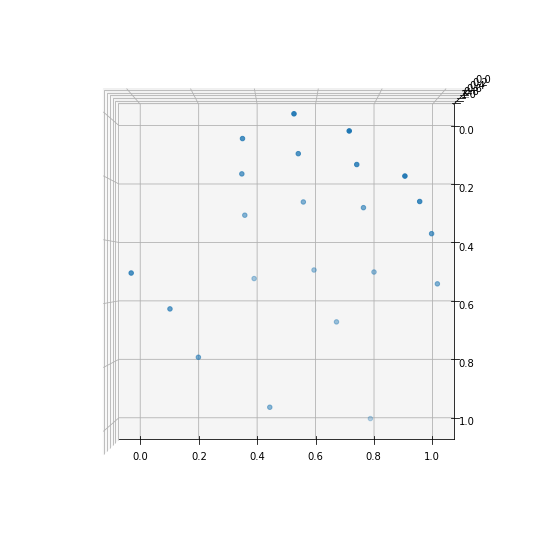

In [97]:
plot3d(mat[:,:1],mat[:,1:2],mat[:,2:3])

------
Liczymy środek ciężkości
https://www.youtube.com/watch?v=QEVuPfLnuTI

Środek ciężkości to jest (suma pozycji*masy poszczególnych punktów)/masa układu dla każdej z osi

```
Nie mam mas, więc daję 1 i wychodzi mi w ten sposob, że to po prostu średnie z wszystkich punktów układu:

(x, y, z)
(średnia wszystkich x/21. średnia wszystkich y/21, średnia wszystkich z/21)
```

In [61]:
import numpy
mat = [[i.x, i.y, i.z] for i in e[0].landmark]
mat
# CM = numpy.average(nonZeroMasses[:,:3], axis=0, weights=nonZeroMasses[:,3])

[[0.5199939608573914, 0.5763368606567383, -1.7280060715663126e-10],
 [0.4938927888870239, 0.5695252418518066, -0.008533592335879803],
 [0.47593826055526733, 0.5461460947990417, -0.012021536007523537],
 [0.4690607190132141, 0.5239511132240295, -0.015500140376389027],
 [0.4598347246646881, 0.5077528953552246, -0.019646478816866875],
 [0.48979559540748596, 0.51036137342453, -0.003838928882032633],
 [0.4875582754611969, 0.4812280535697937, -0.00938338227570057],
 [0.48698872327804565, 0.4629904329776764, -0.015196658670902252],
 [0.4872935712337494, 0.4478204846382141, -0.019802482798695564],
 [0.5052220225334167, 0.5063795447349548, -0.004794488660991192],
 [0.5024140477180481, 0.4752093255519867, -0.00997546873986721],
 [0.5010561943054199, 0.4543832242488861, -0.018664788454771042],
 [0.4999559223651886, 0.437949538230896, -0.02561173215508461],
 [0.5205162763595581, 0.5073155164718628, -0.006810604128986597],
 [0.5175029635429382, 0.4780398905277252, -0.012670453637838364],
 [0.5153833

In [62]:
avg3d = np.average(mat,axis=0)
avg3d

array([ 0.5035243 ,  0.49213822, -0.01451798])

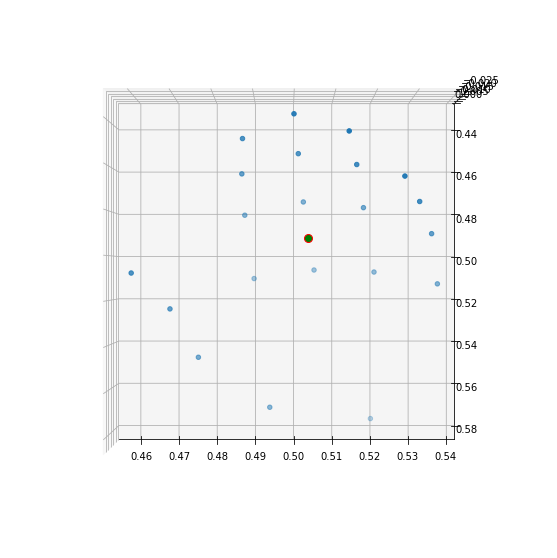

In [63]:
plot3d(xs,ys,zs,avg3d)

---------

To samo tylko spłaszczam do 2D, przy liczeniu środka ciężkości wziąłem Z jako wagę

In [6]:
def plot2d(xs,ys, avg2d=[]):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot()
    # ax.grid(False)
    # ax.axis('off')
    ax.scatter(xs,ys)
    if len(avg2d):
        plt.plot(avg2d[0],avg2d[1], marker="o", markersize=8, markeredgecolor="red", markerfacecolor="green")
    plt.gca().invert_yaxis()
    plt.show()

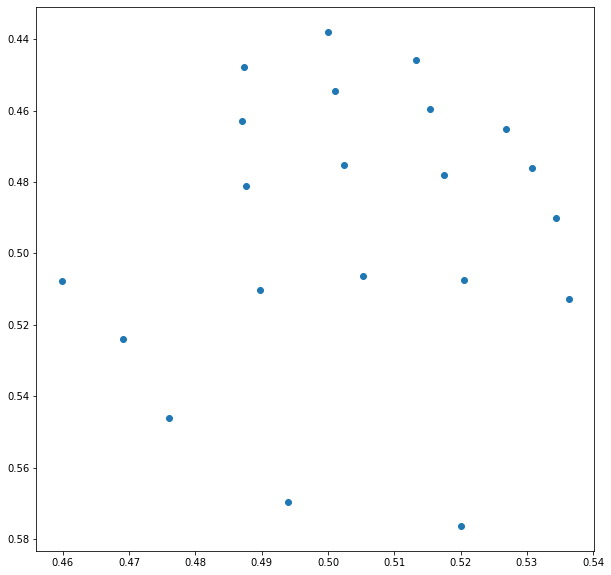

In [10]:
plot2d(xs,ys)

In [11]:
npmat = np.array(mat, dtype=np.float32)
avg2d = numpy.average(npmat[:,:2], axis=0, weights=npmat[:,2:].flatten())

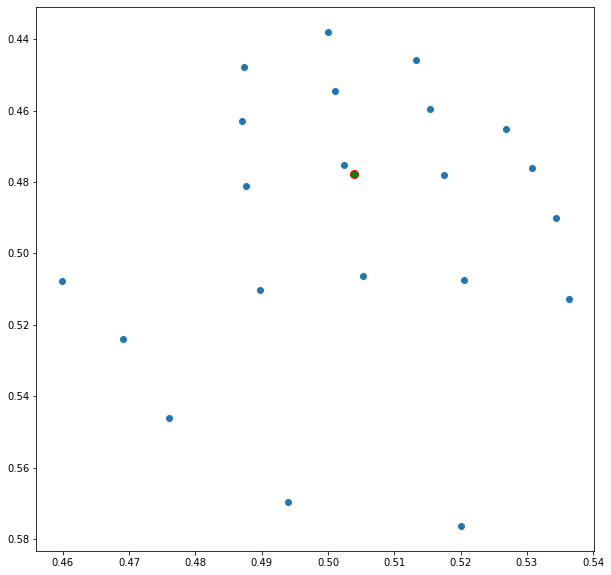

In [12]:
plot2d(xs,ys,avg2d)

![](https://google.github.io/mediapipe/images/mobile/hand_landmarks.png)
A spróbujmy policzyć środek ciężkości tylko ze stawów łączących śródręcze-paliczki bliższe

In [64]:
middleHandIndexes = [0,1,5,9,13,17]

In [65]:
palmLandmarks=list(map(e[0].landmark.__getitem__, middleHandIndexes))

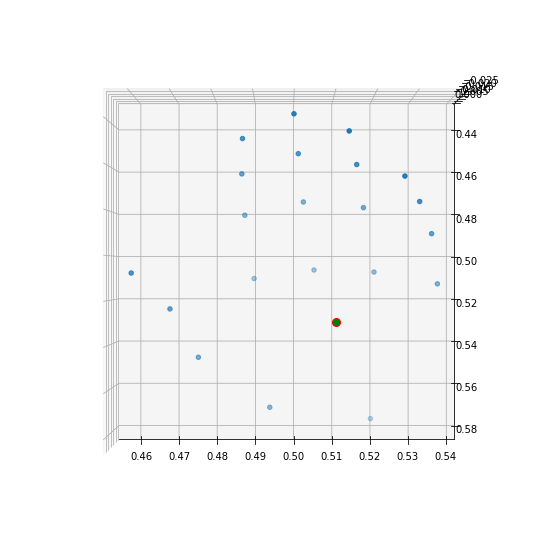

In [66]:
#### palmLandmarks_xs = [i.x for i in palmLandmarks]
# palmLandmarks_ys = [i.y for i in palmLandmarks]
# palmLandmarks_zs = [i.z for i in palmLandmarks]
palmAvg3d = numpy.average([[i.x,i.y,i.z] for i in palmLandmarks],axis=0)
# plot3d(palmLandmarks_xs,palmLandmarks_ys,palmLandmarks_zs,palmAvg3d)
plot3d(xs,ys,zs,palmAvg3d)

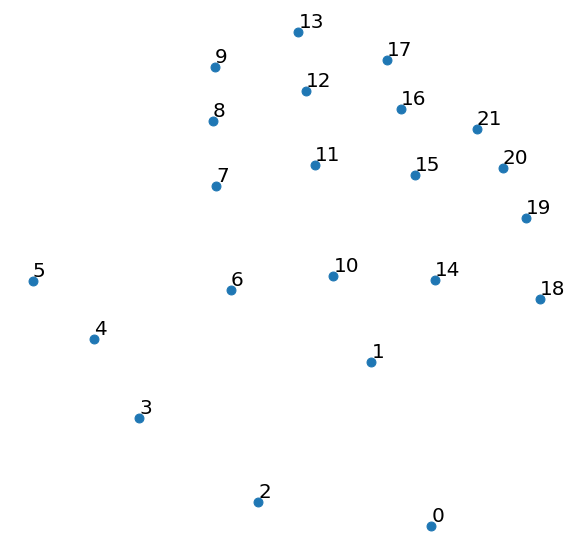

In [46]:
#do dokumentacji
indexes = [i for i in range(22)]
x = mat[:,:1]
y = mat[:,1:2]
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
ax.grid(False)
ax.axis('off')
ax.scatter(x,y, s=80)
for i, txt in enumerate(indexes):
    ax.annotate(txt, (x[i], y[i]), fontsize = 20, horizontalalignment='left', verticalalignment='bottom')
plt.gca().invert_yaxis()
plt.rcParams['savefig.facecolor']='white'
plt.savefig('myjoints.png')

In [67]:
palmAvg3d

array([ 0.5109663 ,  0.53044221, -0.00567112])

In [68]:
mat

[[0.5199939608573914, 0.5763368606567383, -1.7280060715663126e-10],
 [0.4938927888870239, 0.5695252418518066, -0.008533592335879803],
 [0.47593826055526733, 0.5461460947990417, -0.012021536007523537],
 [0.4690607190132141, 0.5239511132240295, -0.015500140376389027],
 [0.4598347246646881, 0.5077528953552246, -0.019646478816866875],
 [0.48979559540748596, 0.51036137342453, -0.003838928882032633],
 [0.4875582754611969, 0.4812280535697937, -0.00938338227570057],
 [0.48698872327804565, 0.4629904329776764, -0.015196658670902252],
 [0.4872935712337494, 0.4478204846382141, -0.019802482798695564],
 [0.5052220225334167, 0.5063795447349548, -0.004794488660991192],
 [0.5024140477180481, 0.4752093255519867, -0.00997546873986721],
 [0.5010561943054199, 0.4543832242488861, -0.018664788454771042],
 [0.4999559223651886, 0.437949538230896, -0.02561173215508461],
 [0.5205162763595581, 0.5073155164718628, -0.006810604128986597],
 [0.5175029635429382, 0.4780398905277252, -0.012670453637838364],
 [0.5153833